**GRISHMA S PATEL**

**Lets Grow More - Virtual Internship Program**

**Intermediate level-2 Task No.01 :Prediction Using Decision Tree**

**July- 2022**

In [1]:
#Importing Required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report,confusion_matrix


In [2]:
#Importing Dataset

df = pd.read_csv('/content/drive/MyDrive/Data Science Internship/Iris.csv')

In [5]:
df.head(17)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [6]:
df.shape

(150, 6)

In [7]:
df.describe(include = "all")

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.500000,5.843333,3.054000,3.758667,1.198667,NaN
std,43.445368,0.828066,0.433594,1.764420,0.763161,NaN
min,1.000000,4.300000,2.000000,1.000000,0.100000,NaN
25%,38.250000,5.100000,2.800000,1.600000,0.300000,NaN
50%,75.500000,5.800000,3.000000,4.350000,1.300000,NaN
75%,112.750000,6.400000,3.300000,5.100000,1.800000,NaN


In [8]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [10]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
# Finding null values

df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [11]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [13]:
# LabelEncoder 

from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
df['Encoded Species']=label.fit_transform(df['Species'])

**EDA**

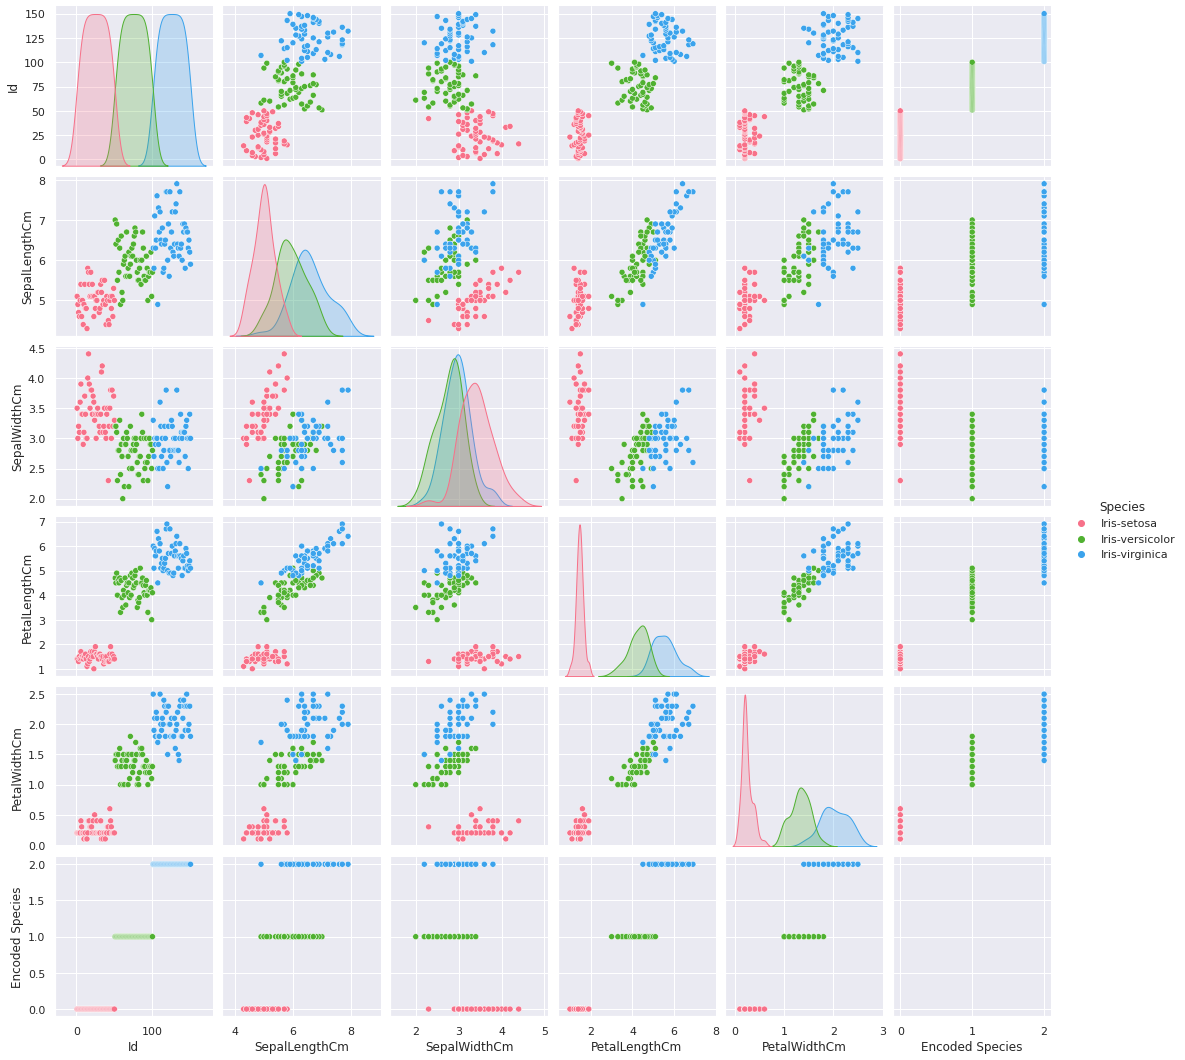

In [14]:
sns.set(rc = {'figure.figsize':(10,6)})
sns.pairplot(df, hue='Species',palette="husl")

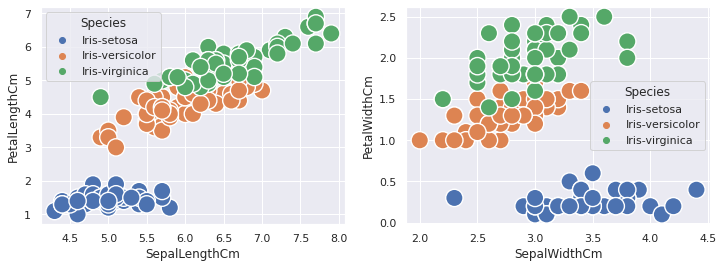

In [16]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,4))
sns.scatterplot(x='SepalLengthCm',y='PetalLengthCm',data=df,hue='Species',ax=ax1,s=300,marker='o')
sns.scatterplot(x='SepalWidthCm',y='PetalWidthCm',data=df,hue='Species',ax=ax2,s=300,marker='o')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


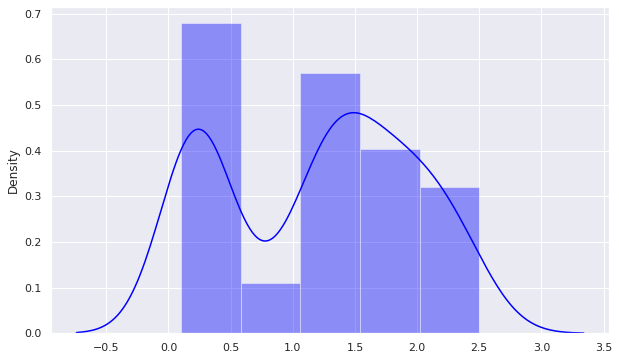

In [17]:
sns.distplot(x=df["PetalWidthCm"], kde=True, color='blue');

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


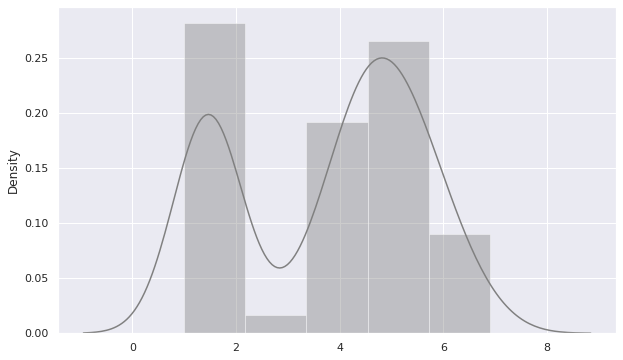

In [18]:
sns.distplot(x=df["PetalLengthCm"], kde=True, color='grey');

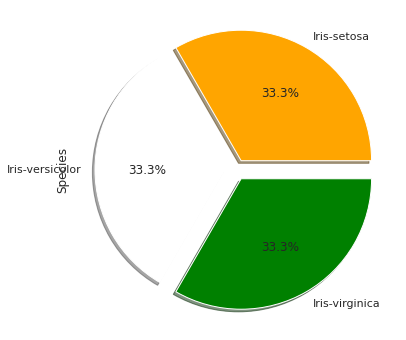

In [20]:
# Pie plot to show the Iris classifications
colors = ['orange','white','green']
df['Species'].value_counts().plot(kind = 'pie',  autopct = '%1.1f%%', shadow = True,colors=colors, explode = [0.08,0.08,0.08])

In [21]:
#Splitting the data set into train and test data

X=df.drop(["Species"],axis=1)
y=df["Species"]

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [25]:
# Decision Tree 
# importing Library for decisionTree

from sklearn.tree import DecisionTreeClassifier
detree=DecisionTreeClassifier()

In [26]:
detree.fit(X_train,y_train)

DecisionTreeClassifier()

In [27]:
#Predicting Decision Tree value

prediction=detree.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,prediction))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



In [28]:
print(confusion_matrix(y_test,prediction))

print(accuracy_score(y_test,prediction)*100,"%")

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
100.0 %


[Text(0.6, 0.8333333333333334, 'X[0] <= 100.5\ngini = 0.664\nsamples = 105\nvalue = [31, 37, 37]'),
 Text(0.4, 0.5, 'X[5] <= 0.5\ngini = 0.496\nsamples = 68\nvalue = [31, 37, 0]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 37\nvalue = [0, 0, 37]')]

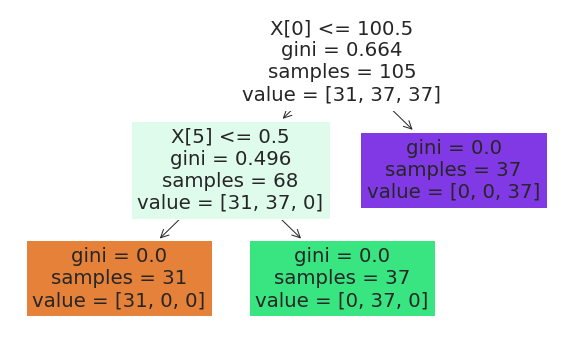

In [41]:
# visualization
from sklearn import tree
feature_name =  ['sepal length(cm)','sepal width(cm)','petal length(cm)','petal width(cm)']
class_name= df.Species.unique()
plt.figure(figsize=(10,6))
tree.plot_tree(detree, filled = True)

**HyperParameter tunning**

In [42]:
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4], 'max_depth':[4,5,6,7]}


In [43]:
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=101), params, verbose=1, cv=3)
grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 1176 candidates, totalling 3528 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=101),
             param_grid={'max_depth': [4, 5, 6, 7],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [44]:
grid_search_cv.best_params_
{'max_depth': 4, 'max_leaf_nodes': 5, 'min_samples_split': 2}
grid_search_cv.best_score_

0.980952380952381

**Building tree**

In [45]:
model=DecisionTreeClassifier(max_depth= 4, max_leaf_nodes= 4, min_samples_split= 2)
model.fit(X_train, y_train)
DecisionTreeClassifier(max_depth=4, max_leaf_nodes=4)
pred=model.predict(X_test)

In [46]:
#Checking the accuracy of the model
score=accuracy_score(y_test,pred)
print("Accuracy of Model:",score)

Accuracy of Model: 1.0


[Text(0.6, 0.8333333333333334, 'X[5] <= 1.5\ngini = 0.664\nsamples = 105\nvalue = [31, 37, 37]'),
 Text(0.4, 0.5, 'X[4] <= 0.8\ngini = 0.496\nsamples = 68\nvalue = [31, 37, 0]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 37\nvalue = [0, 0, 37]')]

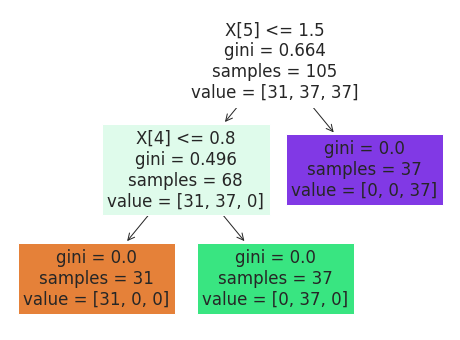

In [51]:
#Visualizing the decision tree
from sklearn import tree
feature_name =  ['sepal length(cm)','sepal width(cm)','petal length(cm)','petal width(cm)']
class_name= df.Species.unique()
plt.figure(figsize=(8,6))
tree.plot_tree(model, filled = True)